In [1]:
import pandas as pd
import seaborn as sb
import phik
from phik import resources, report
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

In [2]:
df_train = pd.read_csv('kaggle_music_genre_train.csv')
df_test = pd.read_csv('kaggle_music_genre_test.csv')

In [3]:
df_train

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,47396.0,O Pato,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,4-Apr,0.942,Jazz
20390,44799.0,Mt. Washington,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,4-Apr,0.174,Rock
20391,33350.0,Original Prankster,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,4-Apr,0.942,Alternative
20392,77920.0,4Peat,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,4-Apr,0.215,Rap


In [4]:
df_test

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,50532,What We Gonna Do About It,0.108000,0.558,163049.0,0.767,0.00000,E,0.0954,-4.561,Minor,0.0491,158.019,4-Apr,0.715
5095,26255,Marilyn (feat. Dominique Le Jeune),0.131000,0.435,196216.0,0.641,0.00000,A#,0.2730,-7.274,Major,0.1040,115.534,3-Apr,0.156
5096,67924,Bipolar,0.152000,0.756,243373.0,0.787,0.00000,D,0.2050,-7.423,Major,0.2400,123.405,4-Apr,0.459
5097,79778,Dead - NGHTMRE Remix,0.001450,0.489,185600.0,0.974,0.63800,F#,0.1230,-2.857,Minor,0.0381,150.036,4-Apr,0.665


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


Я считаю, что instance_id , track_name, obtained_date надо выбросить

In [7]:
df_train = df_train.drop(['instance_id', 'track_name', 'obtained_date'], axis =1)
df_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0.48000,0.670,182653.0,0.351,0.017600,D,0.1150,-16.842,Major,0.0463,101.384,0.450,Country
1,0.24300,0.452,187133.0,0.670,0.000051,A,0.1080,-8.392,Minor,0.0352,113.071,0.539,Rock
2,0.22800,0.454,173448.0,0.804,0.000000,E,0.1810,-5.225,Minor,0.3710,80.980,0.344,Alternative
3,0.05580,0.847,255987.0,0.873,0.000003,G#,0.3250,-4.805,Minor,0.0804,116.007,0.966,Hip-Hop
4,0.22700,0.742,195333.0,0.575,0.000002,C,0.1760,-5.550,Major,0.0487,76.494,0.583,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,0.71900,0.725,-1.0,0.483,0.000000,NaN,0.0797,-13.314,Minor,0.0438,87.413,0.942,Jazz
20390,0.19000,0.482,198933.0,0.362,0.005620,F#,0.0913,-10.358,Minor,0.0299,76.879,0.174,Rock
20391,0.00061,0.663,220947.0,0.886,0.000025,D,0.2840,-4.149,Major,0.0358,146.803,0.942,Alternative
20392,0.00310,0.914,162214.0,0.515,0.000000,C#,0.1050,-9.934,Major,0.3560,150.016,0.215,Rap


In [8]:
# df_test = df_test.drop(['instance_id', 'track_name', 'obtained_date'], axis =1)
# df_test

Тут решил глянуть сколько будет классов

In [9]:
df_train['music_genre'].value_counts()

music_genre
Blues          2858
Alternative    2601
Electronic     2564
Rap            2428
Rock           2165
Country        2120
Anime          1901
Classical      1373
Jazz           1239
Hip-Hop        1145
Name: count, dtype: int64

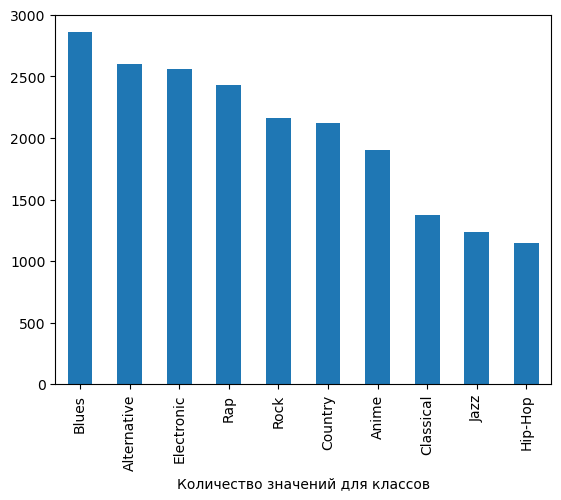

In [10]:
df_train['music_genre'].value_counts().plot(kind = 'bar')
plt.xlabel('Количество значений для классов')
# plt.ylabel('ylabel')
plt.savefig('Количество значений для классов.png')

Смотрю распределение некоторых переменных, которые мне интересны

Ниже видим, что модальность преобладает в основном мажорная с приблизительным соотношением 2:1

In [11]:
df_train['mode'].value_counts()

mode
Major    12828
Minor     7060
Name: count, dtype: int64

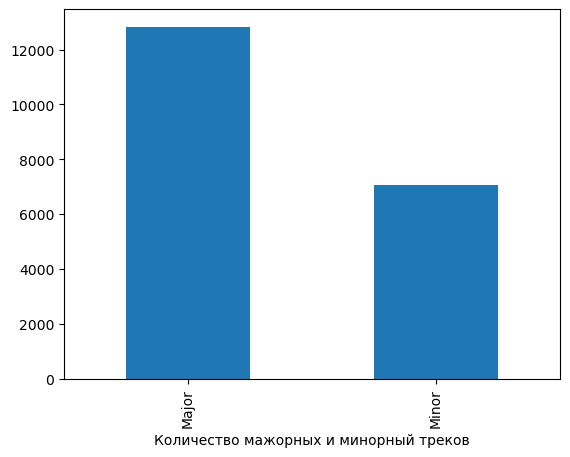

In [12]:
df_train['mode'].value_counts().plot(kind = 'bar')
plt.xlabel('Количество мажорных и минорный треков')
# plt.ylabel('ylabel')
plt.savefig('Гистограмма мажорных и минорный треков.png')

In [13]:
# df_test['mode'].value_counts()

Смотрю распределение тональностей. Относительные доли примерно совпадают

In [14]:
df_train['key'].value_counts(ascending=True, normalize = True)

key
D#    0.030826
F#    0.061346
A#    0.062262
G#    0.064500
E     0.077115
B     0.077420
F     0.082202
A     0.102396
D     0.107330
C#    0.108093
C     0.109314
G     0.117198
Name: proportion, dtype: float64

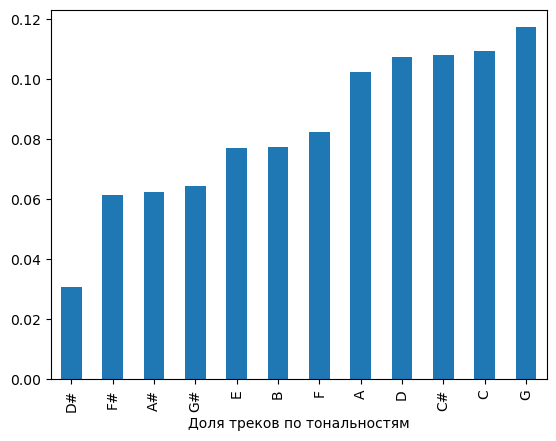

In [15]:
df_train['key'].value_counts(ascending=True, normalize = True).plot(kind = 'bar')
plt.xlabel('Доля треков по тональностям')
# plt.ylabel('ylabel')
plt.savefig('Доля треков по тональностям.png')

In [16]:
# df_test['key'].value_counts(ascending=True, normalize = True)

Смотрим речевой характер

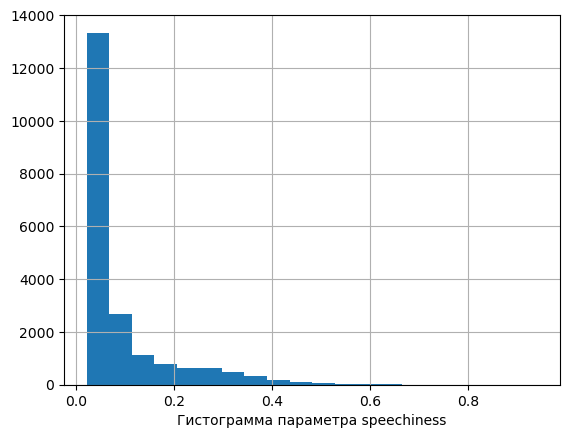

In [17]:
df_train['speechiness'].hist(bins = 20)
# plt.yscale('log')
plt.xlabel('Гистограмма параметра speechiness')
# plt.ylabel('ylabel')
plt.savefig('Гистограмма параметра speechiness.png')

In [18]:
# df_train['speechiness'].value_counts(ascending=True)

In [19]:
# df_test['speechiness'].hist(bins = 20)
# plt.yscale('log')

По описанию значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.

Посмотрим на количество значений в диапазонах:  
  0 : 0.33  
  0.33 : 0.66  
  0.66 : 1.  

In [20]:
df_train[df_train['speechiness'] <= 0.33]['speechiness'].count()

19543

In [21]:
# df_train[df_train['speechiness'] <= 0.66]['speechiness'].count() - df_train[df_train['speechiness'] <= 0.33]['speechiness'].count()

In [22]:
df_train.query("`speechiness` >= 0.33 and `speechiness` <= 0.66")['speechiness'].count()

834

In [23]:
df_train[df_train['speechiness'] >= 0.66]['speechiness'].count()

25

Тестовый датасет смотреть не стал, на гистограмме видно, что относительные значения будут примерно такими же. Большинство треков - не речевые. Все что больльше 0.66 можно вообще отнести к выбросам и откинуть. Можно попробовать добавить новый признак на основе колонки speechiness, поделив на 3 или 2 класса.

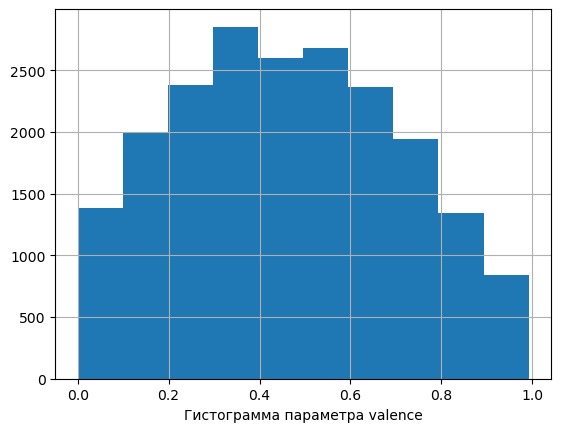

In [24]:
df_train['valence'].hist()
plt.xlabel('Гистограмма параметра valence')
# plt.ylabel('ylabel')
plt.savefig('Гистограмма параметра valence.png')

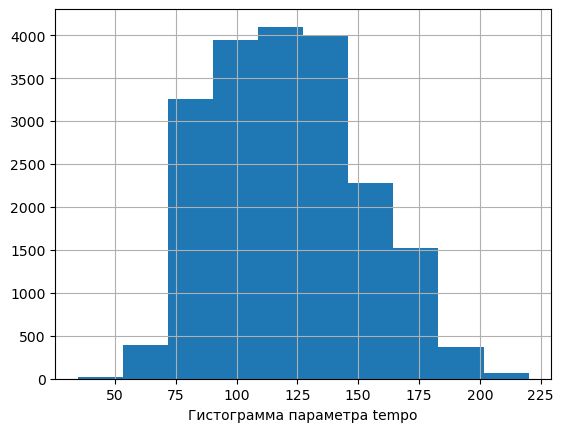

In [25]:
df_train['tempo'].hist()
plt.xlabel('Гистограмма параметра tempo')
# plt.ylabel('ylabel')
plt.savefig('Гистограмма параметра tempo.png')

Здесь видим подобие нормальных распределений, я бы трогать не стал.

interval columns not set, guessing: ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


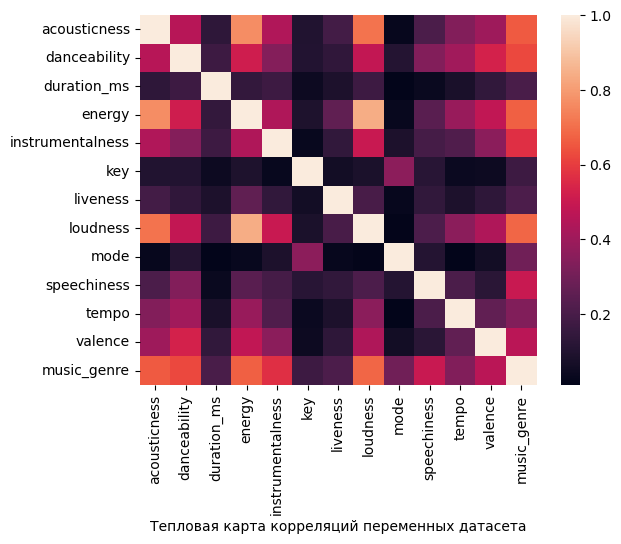

In [26]:
sb.heatmap(df_train.phik_matrix())
plt.xlabel('Тепловая карта корреляций переменных датасета')
# plt.ylabel('ylabel')
plt.savefig('Тепловая карта корреляций переменных датасета.png')

In [27]:
# sb.pairplot(df_train)

In [28]:
# sb.relplot(
#     x=df_train['danceability'],
#     y=df_train['acousticness'], 
#     # data=cars,
#     # palette='bright',
#     col=df_train['music_genre'])

In [29]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['acousticness'],
#     height=4, aspect=2)

In [30]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['danceability'],
#     height=4, aspect=2)

In [31]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['duration_ms'],
#     height=4, aspect=2)

In [32]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['energy'],
#     height=4, aspect=2)

In [33]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['instrumentalness'],
#     height=4, aspect=2)

In [34]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['key'],
#     height=4, aspect=2)

In [35]:
# sb.relplot(
#     x=df_train['music_genre'], 
#     y=df_train['liveness'],
#     height=4, aspect=2)

In [36]:
# corr = df_train.drop(['key', 'mode', 'music_genre'],axis = 1).corr()
# plt.figure(figsize = (10,10))

# sb.heatmap(corr, cmap="Blues", annot=True,  fmt=".1f")
# plt.title('Тепловая карта корреляции переменных датасета', fontsize = 20)

In [37]:
df_train.duplicated().sum()

7

In [38]:
df_train = df_train.drop_duplicates()

## Предобработка

In [39]:
scaler = StandardScaler()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_list = df_train.select_dtypes(include=numerics).columns.tolist()

df_train[numeric_list] = scaler.fit_transform(df_train[numeric_list])

C:\Users\Parkhom\AppData\Local\Temp\ipykernel_8476\3219416701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[numeric_list] = scaler.fit_transform(df_train[numeric_list])


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20387 entries, 0 to 20393
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20387 non-null  float64
 1   danceability      20387 non-null  float64
 2   duration_ms       20387 non-null  float64
 3   energy            20387 non-null  float64
 4   instrumentalness  20387 non-null  float64
 5   key               19653 non-null  object 
 6   liveness          20387 non-null  float64
 7   loudness          20387 non-null  float64
 8   mode              19881 non-null  object 
 9   speechiness       20387 non-null  float64
 10  tempo             19945 non-null  float64
 11  valence           20387 non-null  float64
 12  music_genre       20387 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.2+ MB


In [41]:
object_list = ['key', 'mode']

encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
encoder_ohe.fit(df_train[object_list])

C:\Users\Parkhom\anaconda3\envs\new\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', sparse=False, sparse_output=False)

In [42]:
# df_train['key'].value_counts()

In [43]:
df_train[encoder_ohe.get_feature_names_out()] = \
encoder_ohe.transform(df_train[object_list])

C:\Users\Parkhom\AppData\Local\Temp\ipykernel_8476\1791781703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[encoder_ohe.get_feature_names_out()] = \
C:\Users\Parkhom\AppData\Local\Temp\ipykernel_8476\1791781703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[encoder_ohe.get_feature_names_out()] = \
C:\Users\Parkhom\AppData\Local\Temp\ipykernel_8476\1791781703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [44]:
# encoder_ohe.get_feature_names_out

In [45]:
df_train = df_train.drop(object_list, axis=1)

In [46]:
df_train

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_nan,mode_Minor,mode_nan
0,0.637745,0.628268,-0.297563,-1.091424,-0.464619,-0.500870,-1.506823,-0.460901,-0.642814,-0.060037,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.099057,-0.639874,-0.262216,0.178231,-0.521869,-0.542850,0.029462,-0.574486,-0.258739,0.305636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.145690,-0.628240,-0.370190,0.711565,-0.522035,-0.105063,0.605251,2.861730,-1.313359,-0.495558,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.681038,1.657907,0.281041,0.986193,-0.522024,0.758518,0.681611,-0.111958,-0.162251,2.060047,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.148799,1.047104,-0.197518,-0.199880,-0.522029,-0.135048,0.546163,-0.436342,-1.460785,0.486419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20389,1.380765,0.948212,-1.738699,-0.566050,-0.522035,-0.712568,-0.865401,-0.486483,-1.101949,1.961438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
20390,-0.263827,-0.465359,-0.169114,-1.047643,-0.503701,-0.643001,-0.327974,-0.628721,-1.448132,-1.194036,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20391,-0.852616,0.587548,0.004576,1.037934,-0.521953,0.512637,0.800878,-0.568346,0.849811,1.961438,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20392,-0.844875,2.047657,-0.458826,-0.438686,-0.522035,-0.560841,-0.250887,2.708236,0.955401,-1.025579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
 df_train.isna().sum()

acousticness          0
danceability          0
duration_ms           0
energy                0
instrumentalness      0
liveness              0
loudness              0
speechiness           0
tempo               442
valence               0
music_genre           0
key_A#                0
key_B                 0
key_C                 0
key_C#                0
key_D                 0
key_D#                0
key_E                 0
key_F                 0
key_F#                0
key_G                 0
key_G#                0
key_nan               0
mode_Minor            0
mode_nan              0
dtype: int64

In [48]:
df_train = df_train.dropna()

In [49]:
Target = df_train['music_genre']

In [50]:
df_train = df_train.drop(['music_genre'], axis =1)

## Обучение

In [51]:


# iris = datasets.load_iris()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)

In [52]:
# clf = LogisticRegression(random_state=0)

In [53]:
parameters = {'class_weight':['balanced'],
             'max_iter':[1000, 2000],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
RegModel = GridSearchCV(LogisticRegression(),
                   parameters,
                   n_jobs = -1,
                   cv = 7,
                   return_train_score = True)

In [54]:
RegModel.fit(df_train, Target)

GridSearchCV(cv=7, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_iter': [1000, 2000],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True)

In [55]:
from sklearn.metrics import f1_score

In [56]:
# RegModel.best_estimator_

In [57]:
RegModel.best_params_

{'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}

In [58]:
f1_score(RegModel.predict(df_train), Target, average='micro')

0.3972424166457758

In [59]:
CBC = CatBoostClassifier(verbose=False, 
                         task_type="GPU",
                         devices='0:1')

In [60]:
parameters = {'depth'         : [4,5,6,7,8],
                 'learning_rate' : [0.01,0.05,0.08,0.1],
                  'iterations'    : [10,30,50,70,90,]
                 }


In [61]:
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 7, n_jobs=-1)
Grid_CBC.fit(df_train, Target)


C:\Users\Parkhom\anaconda3\envs\new\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=7,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001D5EFEA4290>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8],
                         'iterations': [10, 30, 50, 70, 90],
                         'learning_rate': [0.01, 0.05, 0.08, 0.1]})

In [62]:
f1_score(Grid_CBC.predict(df_train), Target, average='micro')

0.5261970418651291

In [66]:
Grid_CBC.best_params_

{'depth': 7, 'iterations': 90, 'learning_rate': 0.1}

In [63]:
parameters = {'n_estimators':[100, 200,300, 500],
              'max_depth': [2,4,6,8,12],
              'criterion':['gini', 'entropy', 'log_loss']}
ForModel = GridSearchCV(RandomForestClassifier(),
                   parameters,
                   n_jobs = -1,
                   cv = 7,
                   return_train_score = True)

In [64]:
ForModel.fit(df_train, Target)

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 12],
                         'n_estimators': [100, 200, 300, 500]},
             return_train_score=True)

In [65]:
f1_score(ForModel.predict(df_train), Target, average='micro')

0.7492103284031085

In [67]:
ForModel.best_params_

{'criterion': 'log_loss', 'max_depth': 12, 'n_estimators': 300}